In [2]:
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import interpolate
from tools import Chebyshev

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 8: Function approximation / interpolation

Consider the function
$$
f(x) = \min \{\max\{-1,4(x-0.2)\},1\}
$$


### 1. The ex-ante code contains an example of how well linear interpolation can approximate this function.
### Re-do the analysis with: 
<ol type ="a">
<li> Cubic spline (use scipy.interpolate.CubicSpline) </li>
<li> Regression with regular polynomials of 4th order</li>
<li> Regression with Chebyshev polynomials (see Chebyshev.py) </li>
</ol>


In [3]:
# Define the function 
f = lambda x: np.minimum(np.maximum(-1,4*(x-0.2)),1)

### setup for notebook

In [4]:
interval = [-1,1]
N_known = 10      # number of known points
N_true = 1000     # number of true points
N = 150           # number of points for interpolation

# function values
x_true  = np.linspace(interval[0],interval[1],N_true)
f_true  = f(x_true)

# points you want to interpolate
G = np.linspace(interval[0],interval[1],N)

# known points
x_known = np.linspace(-0.8,0.8,N_known)
f_known = f(x_known)

In [5]:
# define function for plotting, using arbitrary interpolation
def plot(f_interp):

    f, ax = plt.subplots(figsize=(10,4)) 
    ax.plot(x_true,f_true, label='True')
    ax.plot(G,f_interp,color='red', label='Interpolatiom')
    ax.scatter(x_known,f_known, label='Known nodes')
    ax.set_xlabel("x")
    ax.set_ylabel("$f(x)$")
    ax.legend()

$\textbf{Example:}$ Linear interpolation using $\texttt{np.interp()}$, which (by default) extrapolates if points fall outside the interval of known nodes using a $\textit{nearest-neighbors}$ approach, setting the function value equal to $-1$ if $x<-1$ and $1$ if $x>1$ (in our case). This is something to be cautios of, since extrapolation is a lot worse than interpolation when approximating functions.

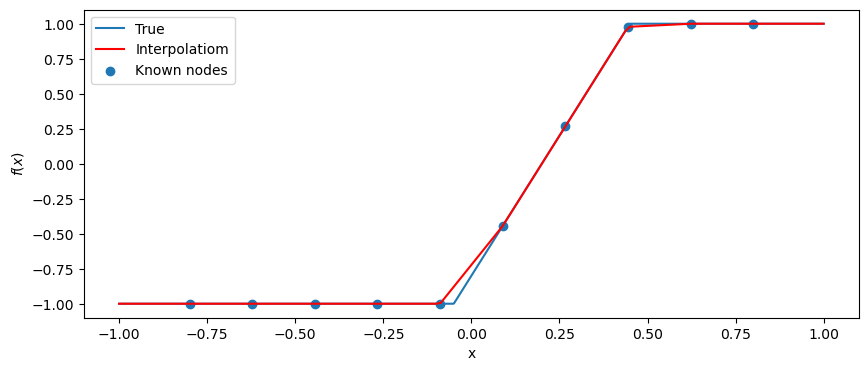

In [6]:
# Interpolate
f_linear_interp = np.interp(G, x_known, f_known)

# Plot
plot(f_linear_interp)

#### 1) Cubic spline (use scipy.interpolate.CubicSpline)

In [ ]:
# Interpolate

# FILL IN. Hint: Check scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html




# Plot
plot(f_cubicSpine_interp)

#### (2) Regression with regular polynomials of 4th order

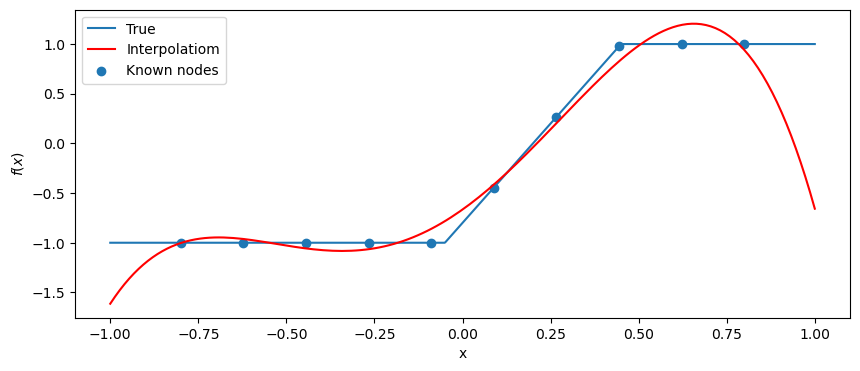

In [ ]:
# Define the variables for the regression
X = np.transpose([x_known**(i) for i in range(4+1)])

# FILL IN.
#Hint:  1) Find OLS parameter estimates: Remember the analytical matrix expression for the OLS estimates
#       2) Predict/calculate function values at known points (f_reg_curvefit)




# Plot
plot(f_reg_curvefit)

#### (3) Regression with Chebyshev polynomials (see $\texttt{Chebyshev.py}$)

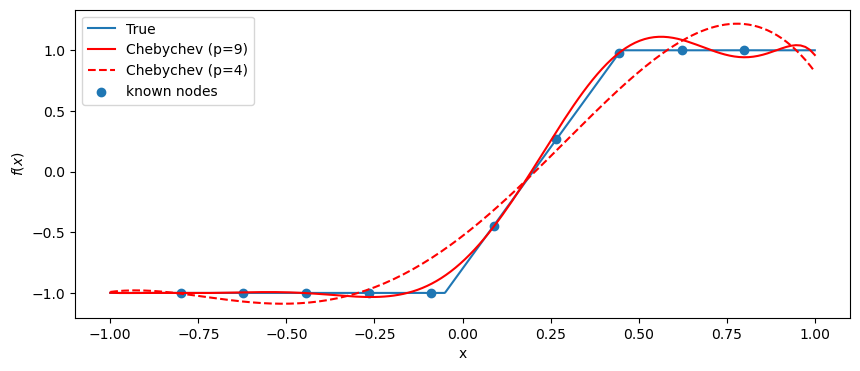

In [10]:
f_chebyshev_9,_,_ = Chebyshev(f,G,N_known,9)
f_chebyshev_4,_,_ = Chebyshev(f,G,N_known,4)

fig, ax = plt.subplots(figsize=(10,4)) 
ax.plot(x_true,f_true, label='True')
ax.plot(G,f_chebyshev_9,'red', label='Chebychev (p=9)')
ax.plot(G,f_chebyshev_4,'red',ls='--', label='Chebychev (p=4)')
ax.scatter(x_known,f_known, label='known nodes')
ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
ax.legend();

### Next consider the function
$$
g(x,z) = (x+1)^{0.4} \cdot (z+1)^{0.4} + \mathbb{1}_{zx>0.3}
$$

### 2. Use the ex-ante code to investigate how large the error is from using linear interpolation

In [ ]:
# Define a function
g = lambda x,z: ((x+1)**0.4)*((z+1)**0.4)+1*(z*x>0.3)

# Values for interpolation
N_true = 500
x_true = np.linspace(0,1,N_true)
z_true = np.linspace(0,1,N_true)
x_true_mat, z_true_mat = np.meshgrid(x_true,z_true)

# FILL IN. Delete "None"
g_true = None




# Known values
N_known = 20
x_known = np.linspace(0,1,N_known)
z_known = np.linspace(0,1,N_known)
x_known_mat, z_known_mat = np.meshgrid(x_known,z_known)

# FILL IN. Delete "None"
g_known = None




# FILL IN. Delete "None". Hint: Linear interpolation in 2D can be done using interpolate.RegularGridInterpolator from scipy
g_func_interp = None




g_linear_interp = g_func_interp((x_true_mat,z_true_mat))

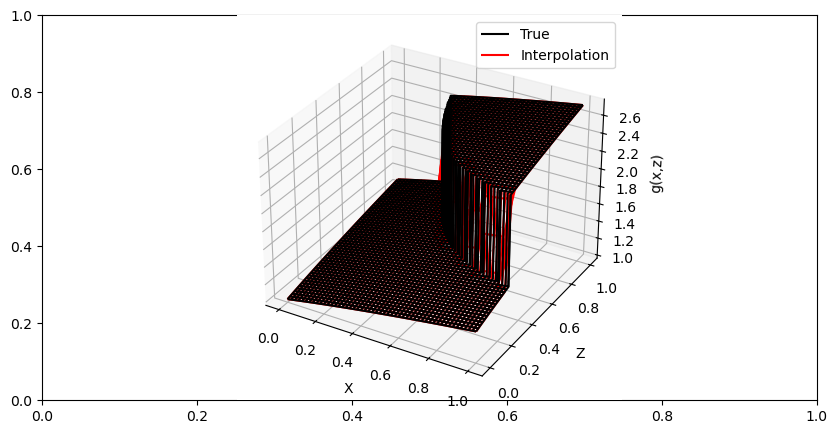

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Plot the surface.
ax.plot_wireframe(x_true_mat, z_true_mat, g_true, color='black')
ax.plot_wireframe(x_true_mat, z_true_mat, g_linear_interp, color='red')
ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'g(x,z)')
ax.legend(('True','Interpolation'));

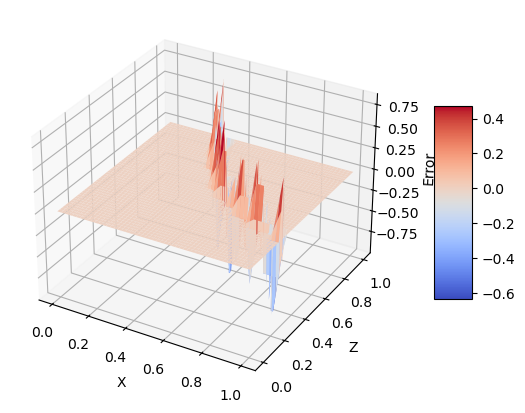

In [13]:
# Plot the interpolation error
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')
surf=ax.plot_surface(x_true_mat, z_true_mat,g_linear_interp-g_true, cmap=cm.coolwarm)
# Customize the axis.

ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'Error')
fig.colorbar(surf, shrink=0.5,aspect=5);